In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [34]:
'''
Datos pertenecientes a Campaña publicitaria
'''

df = pd.read_csv('C:/Users/ASUS/Documents/Exam_1_Cuantitativo/publicidad.csv', sep = ',').drop('Unnamed: 0', axis=1)

In [35]:
df.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


<function matplotlib.pyplot.show(close=None, block=None)>

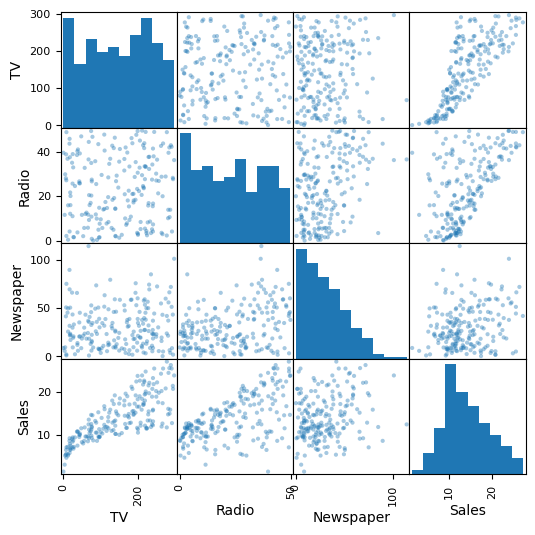

In [36]:
pd.plotting.scatter_matrix(df, alpha=0.4, figsize = (6, 6))
plt.show

<AxesSubplot:>

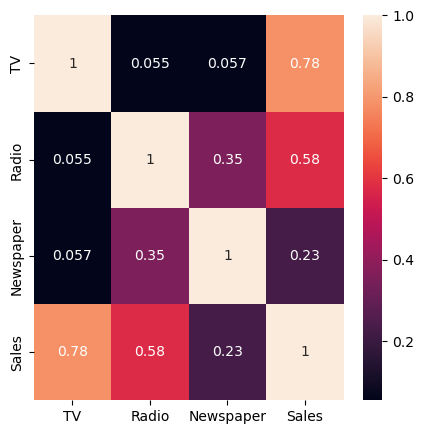

In [37]:
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True,  xticklabels=df.columns,
                yticklabels=df.columns)

In [38]:
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [39]:
### Ejecutando un modelo lineal (Regresion Simple)


X = sm.add_constant(df['TV'])
model = sm.OLS(df['Sales'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.47e-42
Time:                        19:29:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [40]:
pred = results.get_prediction([1, 5])
print(pred.summary_frame(alpha=0.05))

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  7.270277  0.446269       6.390226       8.150327      0.784168   

   obs_ci_upper  
0     13.756385  


In [43]:
# Imprimir la ecuación de la recta
print(f"La ecuación de la recta es: Ventas = {results.params[0]:.2f} + {results.params[1]:.2f} * TV")

# Imprimir el valor del coeficiente de determinación R2
print(f"El coeficiente de determinación R2 es: {results.rsquared:.2f}")

# Realizar una predicción del retorno de inversión esperado
TV = 5
Sales_pred = results.predict([1, TV])[0]
print(f"El retorno de inversión esperado para {TV} anuncios es: {Sales_pred:.2f}")

La ecuación de la recta es: Ventas = 7.03 + 0.05 * TV
El coeficiente de determinación R2 es: 0.61
El retorno de inversión esperado para 5 anuncios es: 7.27


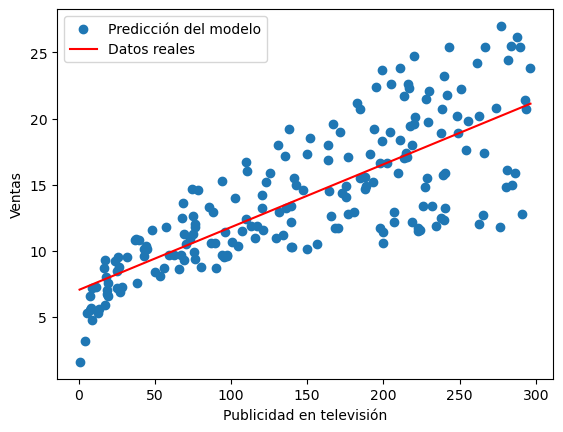

In [44]:
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)

# Calcular los valores correspondientes de TV utilizando la ecuación del modelo
y_pred = results.predict(sm.add_constant(x))

# Trazar el scatterplot de datos reales
plt.scatter(df['TV'], df['Sales'] )

# Trazar la línea de la predicción del modelo
plt.plot(x, y_pred, color='red')

# Configurar la leyenda y los títulos de los ejes
plt.legend(['Predicción del modelo', 'Datos reales'])
plt.xlabel('Publicidad en televisión')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

**El intervalo de confianza del 95% para la predicción va desde $24,993.99 hasta $36,114.32.**

In [45]:
X = sm.add_constant(df['TV'])
model = sm.OLS(df['Sales'], X)
results = model.fit()

# Imprimir la ecuación de la recta
print(f"La ecuación de la recta es: Sales = {results.params[0]:.2f} + {results.params[1]:.2f} * TV")

# Imprimir el valor del coeficiente de determinación R2
print(f"El coeficiente de determinación R2 es: {results.rsquared:.2f}")

# Realizar una predicción del retorno de inversión esperado
tv = 5
sales_pred = results.predict([1, tv])[0]
print(f"El retorno de inversión esperado para un gasto de {tv} miles de dólares en publicidad en televisión es: {sales_pred:.2f}")

La ecuación de la recta es: Sales = 7.03 + 0.05 * TV
El coeficiente de determinación R2 es: 0.61
El retorno de inversión esperado para un gasto de 5 miles de dólares en publicidad en televisión es: 7.27


In [46]:
# regresión Poisson
X = sm.add_constant(df['TV'])
model2 = sm.GLM(df['Sales'], X, family=sm.families.Poisson())
results2 = model2.fit()

# Imprimir el resumen del modelo
print(results2.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Sales   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -516.98
Date:                Mon, 08 May 2023   Deviance:                       150.75
Time:                        19:32:36   Pearson chi2:                     146.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6989
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0842      0.044     47.778      0.0

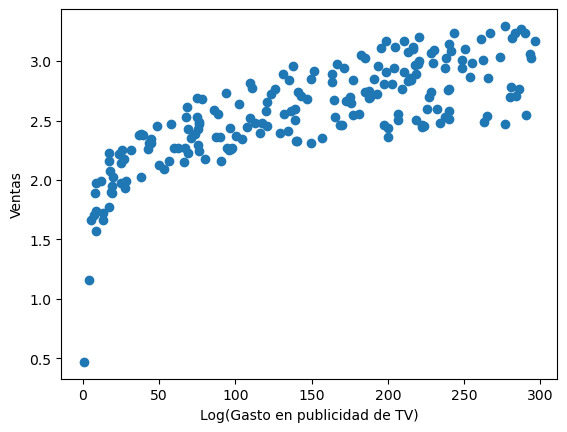

In [47]:
x = df['TV']
y = df['Sales']

# Aplicar una transformación logarítmica a la variable predictora
y_transformed = np.log(y)

# Graficar la relación entre la variable transformada y la variable de respuesta
plt.scatter(x, y_transformed)
plt.xlabel('Log(Gasto en publicidad de TV)')
plt.ylabel('Ventas')
plt.show()


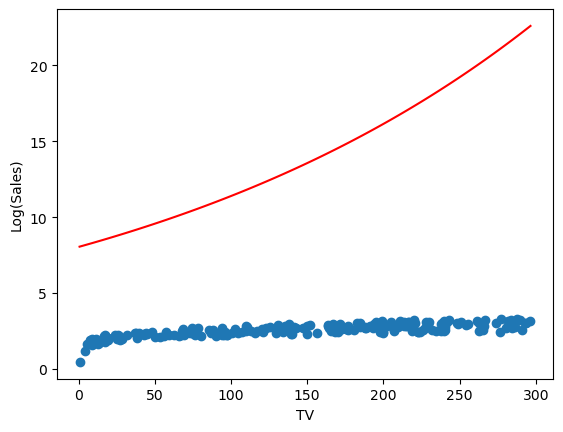

In [48]:
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)

# Calcular los valores simulados de Log(y) utilizando el modelo ajustado
y_sim = results2.predict(sm.add_constant(x))

# Graficar los datos y la línea simulada
plt.scatter(df['TV'], np.log(df['Sales']))
plt.plot(x, y_sim, color='red')
plt.xlabel('TV')
plt.ylabel('Log(Sales)')
plt.show()

In [49]:
# regresión Poisson
X = sm.add_constant(df['TV'])
model2 = sm.GLM(df['Sales'], X, family=sm.families.Poisson())
results2 = model2.fit()

# Imprimir el resumen del modelo
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Sales   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -516.98
Date:                Mon, 08 May 2023   Deviance:                       150.75
Time:                        19:32:43   Pearson chi2:                     146.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6989
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0842      0.044     47.778      0.0

In [50]:
results2.params[0]


2.0841965826688025

In [51]:
results2.params[1]

0.003486058919675567

λ = exp(2.0842 + 0.0035 * TV)

In [52]:
b0_1 = results2.params[0]
b1_1 = results2.params[1]

y_hat = np.exp(b0_1 + b1_1 * df["TV"])

In [53]:

def poisson_model(TV):
    return np.exp(2.0842 + 0.0035 * TV)

In [54]:
TV = 5
predicted_sales = poisson_model(TV)
print(predicted_sales)

8.180064208224115


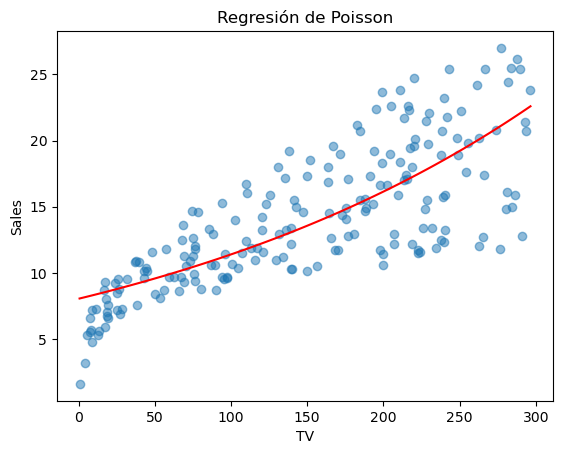

In [55]:
# variable predictora
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)
y = results2.predict(sm.add_constant(x))

plt.scatter(df['TV'], df['Sales'], alpha=0.5) 
plt.plot(x, y, color='red') 
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresión de Poisson')
plt.show()

In [56]:
X = sm.add_constant(df['TV'])
###################################
model = sm.OLS(df['Sales'], X)
results = model.fit()
print(results.summary())
###################################
model2 = sm.GLM(df['Sales'], X, family=sm.families.Poisson())
results2 = model2.fit()


from sklearn.metrics import mean_squared_error
# Predecir los valores de y utilizando los dos modelos
df['pred_linear'] = results.predict(X)
df['pred_poisson'] = results2.predict(X)


rmse_linear = np.sqrt(mean_squared_error(df['Sales'], df['pred_linear']))
rmse_poisson = np.sqrt(mean_squared_error(df['Sales'], df['pred_poisson']))

# Imprimir los valores de RMSE
print('lineal', rmse_linear)
print('Poisson', rmse_poisson)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.47e-42
Time:                        19:32:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

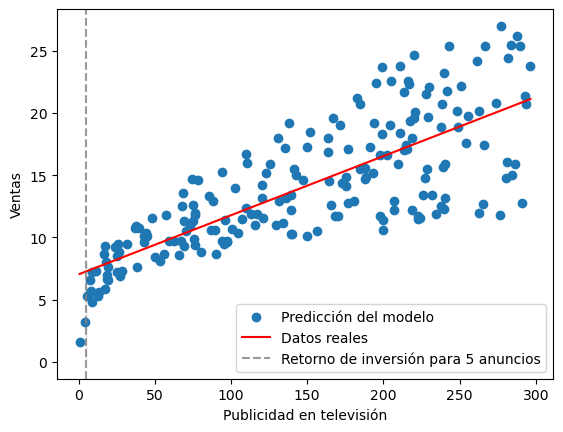

In [58]:
# Crear un array de 100 valores equidistantes entre los valores mínimo y máximo de TV en el dataframe
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)

# Calcular los valores correspondientes de ventas utilizando la ecuación del modelo para cada valor de TV
y_pred = results.predict(sm.add_constant(x))

# Realizar una predicción del retorno de inversión esperado para 5 anuncios y su intervalo de confianza
sales_pred = results.get_prediction([1, 5])
sales_pred_mean = sales_pred.predicted_mean
sales_pred_ci = sales_pred.conf_int()

# Obtener los límites inferior y superior del intervalo de confianza
lower_ci, upper_ci = sales_pred_ci[0]

# Trazar el scatterplot de datos reales
plt.scatter(df['TV'], df['Sales'] )

# Trazar la línea de la predicción del modelo
plt.plot(x, y_pred, color='red')

# Agregar una línea vertical para la predicción del retorno de inversión para 5 anuncios
plt.axvline(x=5, color='gray', linestyle='--', alpha=0.8)

# Agregar una banda de error para el intervalo de confianza de la predicción
plt.fill_between([5, 5], [lower_ci, upper_ci], color='gray', alpha=0.2)

# Configurar la leyenda y los títulos de los ejes
plt.legend(['Predicción del modelo', 'Datos reales', 'Retorno de inversión para 5 anuncios'])
plt.xlabel('Publicidad en televisión')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

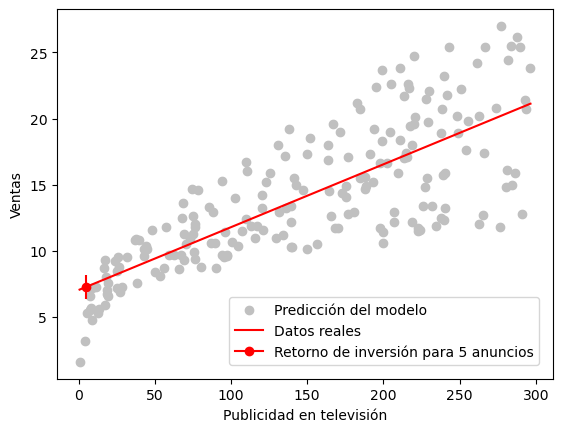

In [67]:
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)

# Calcular los valores correspondientes de ventas utilizando la ecuación del modelo para cada valor de TV
y_pred = results.predict(sm.add_constant(x))

# Realizar una predicción del retorno de inversión esperado para 5 anuncios y su intervalo de confianza
sales_pred = results.get_prediction([1, 5])
sales_pred_mean = sales_pred.predicted_mean
sales_pred_ci = sales_pred.conf_int()

# Obtener los límites inferior y superior del intervalo de confianza
lower_ci, upper_ci = sales_pred_ci[0]

# Trazar el scatterplot de datos reales
plt.scatter(df['TV'], df['Sales'] , color ='#C0C0C0')

# Trazar la línea de la predicción del modelo
plt.plot(x, y_pred, color='red')

# Agregar un punto rojo para el promedio predicho
plt.plot(5, sales_pred_mean, marker='o', color='red')

# Agregar barras rojas que indiquen el intervalo de confianza
plt.errorbar(5, sales_pred_mean, yerr=np.array([sales_pred_mean-lower_ci, upper_ci-sales_pred_mean]).reshape(2,1), color='red')

# Configurar la leyenda y los títulos de los ejes
plt.legend(['Predicción del modelo', 'Datos reales', 'Retorno de inversión para 5 anuncios'],
          loc='lower right', bbox_to_anchor=(1, 0), borderaxespad=1)
plt.xlabel('Publicidad en televisión')
plt.ylabel('Ventas')

plt.savefig('table_4.png', dpi=300)
# Mostrar el gráfico
plt.show()